In [ ]:
'''
[1.5] 正态性检验

利用观测数据判断总体是否服从正态分布的检验称为正态性检验，它是统计判决中重要的一种特殊的拟合优度假设检验。

直方图初判 / QQ图判断 / K-S检验

'''

In [2]:
# 导包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

      values
0  10.820543
1  10.289190
2   8.872228
3   9.868846
4  10.311870
----------------------------------------------------------------------------------------


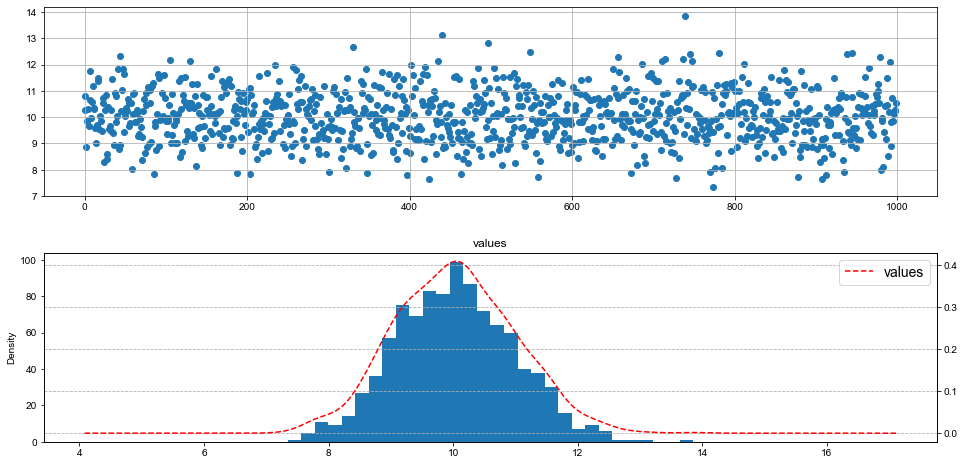

In [3]:
# 1.直方图初判
# 创建符合正态分布的数据
data = pd.DataFrame(np.random.randn(1000) + 10, columns=['values'])
print(data.head())
print('-' * 88)

# 绘制散点图初步检验正态性
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(211)
ax1.scatter(data.index, data.values)
plt.grid()

# 绘制直方图和密度图进一步确认
ax2 = fig.add_subplot(212)
data.hist(bins=30, ax=ax2)
data.plot(kind='kde', ax=ax2, style='--r', secondary_y=True, legend=False)
plt.legend(fontsize=14)
plt.grid(linestyle='--')

      values
0   8.455124
1   9.386333
2  10.452530
3   9.351958
4  10.250194
----------------------------------------------------------------------------------------
数据的平均值是:
 9.999804072140163
数据的标准差为:
 1.0019099814514083
----------------------------------------------------------------------------------------
0.25 9.295448493824766
0.75 10.675113358692643
----------------------------------------------------------------------------------------


,index,values,p,q
0,926,7.108363,-0.0005,-1.541735
1,337,7.139335,0.0005,-0.612302
2,949,7.142714,0.0015,0.451862
3,111,7.307838,0.0025,-0.646611
4,54,7.324441,0.0035,0.249913


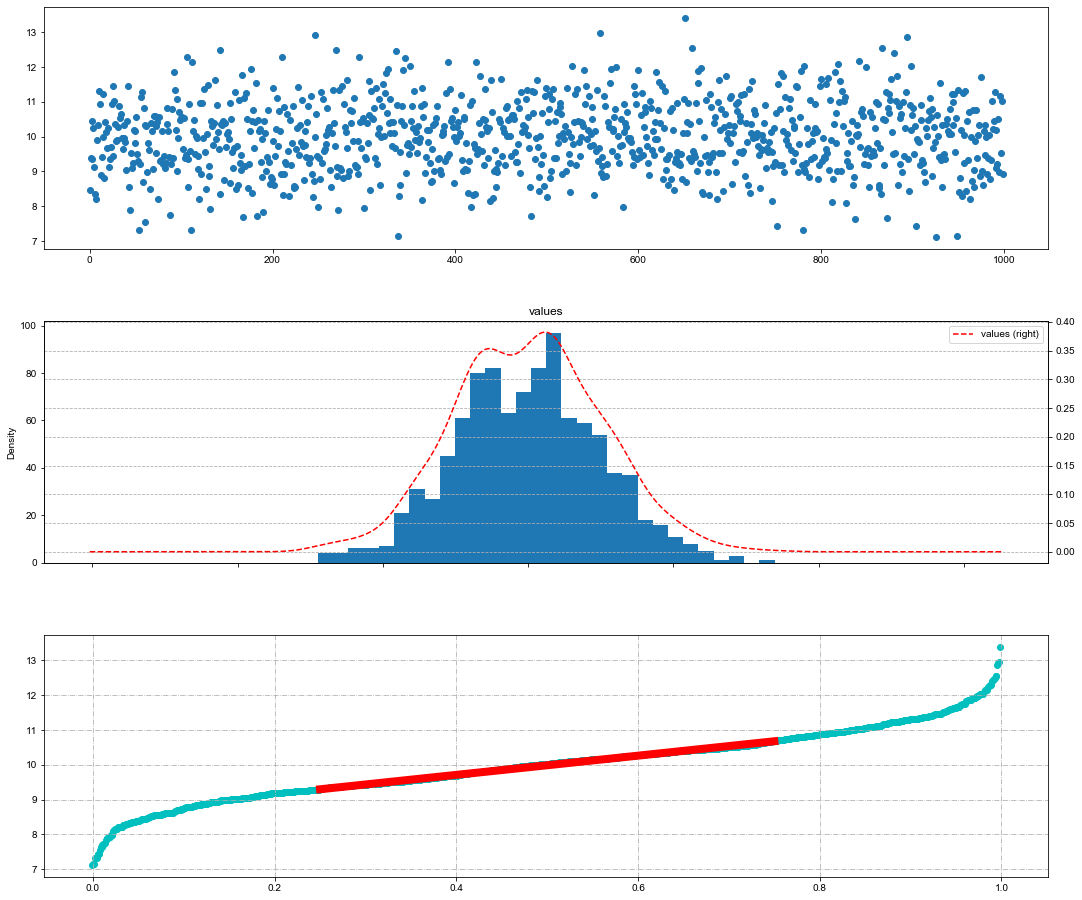

In [42]:
# 2.QQ图
# QQ图判断
# QQ图通过把测试样本数据的分位数与已知分布相比较，从而来检验数据的分布情况

# QQ图是一种散点图，对应于正态分布的QQ图，就是由标准正态分布的分位数为横坐标，样本值为纵坐标的散点图
# 参考直线：四分之一分位点和四分之三分位点这两点确定，看散点是否落在这条线的附近

# 绘制思路
# ① 在做好数据清洗后，对数据进行排序（次序统计量：x(1)<x(2)<....<x(n)）
# ② 排序后，计算出每个数据对应的百分位p{i}，即第i个数据x(i)为p(i)分位数，其中p(i)=(i-0.5)/n （pi有多重算法，这里以最常用方法为主）
# ③ 绘制直方图 + qq图，直方图作为参考

# 创建数据
data = pd.DataFrame({'values':np.random.randn(1000) + 10})
print(data.head())
print('-' * 88)

# 做散点图初步检验
fig, axes = plt.subplots(3, 1, figsize=(18, 16))
axes[0].scatter(data.index, data.values)

# 做柱状图和密度曲线初步检验
data.hist(bins=30, ax=axes[1])
data.plot(kind='kde', style='--r', secondary_y=True, ax=axes[1])
plt.grid(linestyle='--')

# 绘制QQ图
# 计算数据的平均数和标准差
mean = data['values'].mean()
std = data['values'].std()
print("数据的平均值是:\n", mean)
print("数据的标准差为:\n", std)
print('-' * 88)

# 对数据进行排序
data.sort_values(['values'], inplace=True)
# 重新设置数据的索引
data_r = data.reset_index(drop=False)
# 计算数据的百分位
data_r['p'] = (data_r.index - 0.5) / len(data_r)
# 计算q值
data_r['q'] = (data['values'] - mean) / std
# 确定数据的1分位数和3分位数
x1, first = 0.25, data_r['values'].quantile(q=0.25)
x2, third = 0.75, data_r['values'].quantile(q=0.75)
print(x1, first)
print(x2, third)
print('-' * 88)
# 绘制QQ图
axes[2].scatter(data_r['p'], data_r['values'], color='c')
axes[2].plot([x1, x2], [first, third], 'r', linewidth=8)
axes[2].grid(linestyle='-.')
data_r.head()

血糖浓度的平均值: 79.74285714285715
血糖浓度的标准差: 5.937631024648968
----------------------------------------------------------------------------------------
D值为: 0.15965714285714283


,血糖浓度,频数,累计频数,累计频率,标准化取值,理论分布,D
0,68,2,2,0.057143,-1.977701,0.0244,0.032743
1,72,2,4,0.114286,-1.304031,0.0968,0.017486
2,75,2,6,0.171429,-0.798779,0.2148,0.043371
3,76,2,8,0.228571,-0.630362,0.2643,0.035729
4,77,6,14,0.400000,-0.461945,0.3228,0.077200
5,78,3,17,0.485714,-0.293527,0.3859,0.099814
6,80,6,23,0.657143,0.043307,0.5160,0.141143
7,81,3,26,0.742857,0.211725,0.5832,0.159657
8,84,2,28,0.800000,0.716977,0.7611,0.038900
9,86,2,30,0.857143,1.053811,0.8531,0.004043


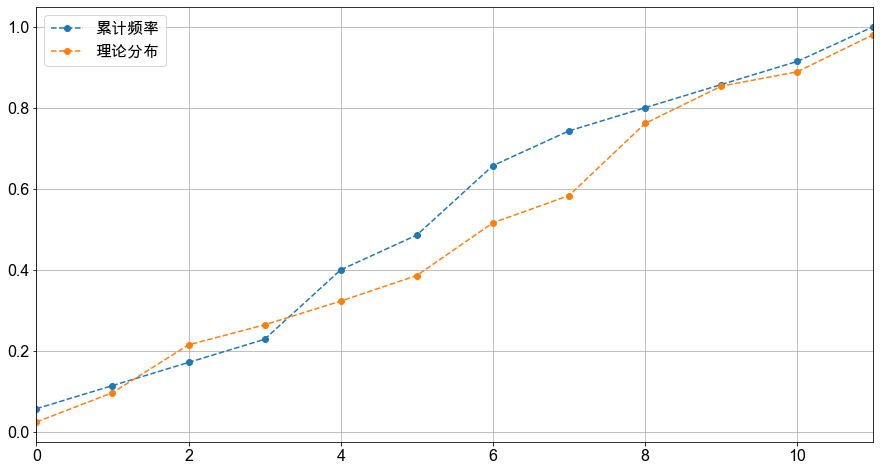

In [73]:
# KS检验
data = [87,77,92,68,80,78,84,77,81,80,80,77,92,86,
       76,80,81,75,77,72,81,72,84,86,80,68,77,87,
       76,77,78,92,75,80,78]
# 样本数据，35位健康男性在未进食之前的血糖浓度
s = pd.DataFrame(data, columns=['血糖浓度'])

# 计算样本数据的平均值和标准差
mean = s['血糖浓度'].mean()
print("血糖浓度的平均值:", mean)
std = s['血糖浓度'].std()
print("血糖浓度的标准差:", std)
print('-' * 88)

# 计算样本数据的频数
df_s = s["血糖浓度"].value_counts().sort_index()
df_s = pd.DataFrame({"血糖浓度":df_s.index, "频数":df_s.values})

# 计算累计累计频数
df_s['累计频数'] = df_s['频数'].cumsum()
# 计算累计频率
df_s['累计频率'] = df_s['累计频数'] / df_s['频数'].sum()
# 计算标准化取值
df_s['标准化取值'] = (df_s['血糖浓度'] - mean) / std
# 查表，找出理论分布
df_s['理论分布'] = [0.0244,0.0968,0.2148,0.2643,0.3228,0.3859,0.5160,0.5832,0.7611,0.8531,0.8888,0.9803]

# 计算D值
df_s['D'] = np.abs(df_s['累计频率'] - df_s['理论分布'])
# 取出最大的D值
D = df_s['D'].max()
print('D值为:', D)

# 画图展示
plt.figure(figsize=(15, 8))
df_s['累计频率'].plot(style='--o', fontsize=16)
df_s['理论分布'].plot(style='--o', fontsize=16)
plt.legend(fontsize=16)
plt.grid()

df_s

In [77]:
# KS检验算法
from scipy import stats

data = [87,77,92,68,80,78,84,77,81,80,80,77,92,86,
       76,80,81,75,77,72,81,72,84,86,80,68,77,87,
       76,77,78,92,75,80,78]

df = pd.DataFrame({'values':data})
mean = df['values'].mean()
std = df['values'].std()
stats.kstest(df['values'], 'norm', (mean, std))
# p值大于0.05，服从正态分布

KstestResult(statistic=0.1590180704824098, pvalue=0.3066297258358026)